#### Polynomial Regression 을 이용한 Underfitting, Overfitting 이해

- cosine 곡선에 약간의 Noise 변동값을 더하여, 실제값 곡선을 만듬

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

%matplotlib inline

#random 값으로 구성된 X값에 대해 Cosine 변환값을 반환
def true_func(X):
    return np.cos(1.5*np.pi*X)

# X는 0 부터 1까지 30개의 random 값을 순서대로 sampling 한 데이터입니다.
np.random.seed(0)
n_samples = 30

X = np.sort(np.random.rand(n_samples))

# y는 cosine 기반의 true_func()에서 약간의 noise 변동값을 더한 값입니다.
y = true_func(X)+np.random.randn(n_samples)*0.1

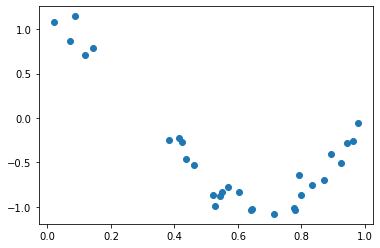

In [4]:
plt.scatter(X,y)


Degree 1 회귀 계수는 [-1.61] 입니다.
Degree 1 MSE는 0.41 입니다.

Degree 4 회귀 계수는 [  0.47 -17.79  23.59  -7.26] 입니다.
Degree 4 MSE는 0.04 입니다.

Degree 15 회귀 계수는 [-2.98295000e+03  1.03899930e+05 -1.87417069e+06  2.03717225e+07
 -1.44873988e+08  7.09318780e+08 -2.47066977e+09  6.24564048e+09
 -1.15677067e+10  1.56895696e+10 -1.54006776e+10  1.06457788e+10
 -4.91379977e+09  1.35920330e+09 -1.70381654e+08] 입니다.
Degree 15 MSE는 182815433.41 입니다.


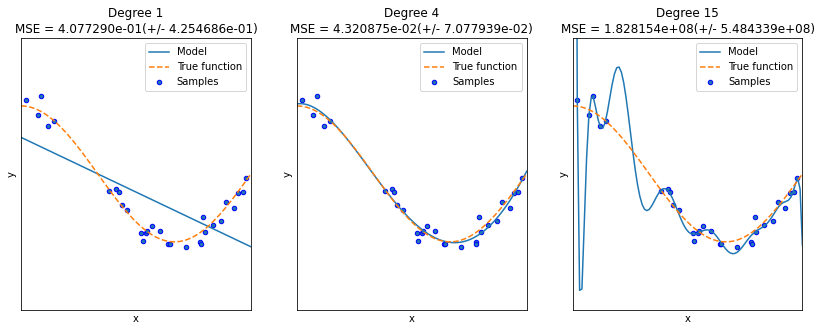

In [6]:
plt.figure(figsize=(14,5))

#N차 방정식을 만들도록 결정
degrees = [1,4,15]

#다항 회귀의 차수(degree)를 1,4,15로 각각 변화시켜나가면서 비교합니다.

for i in range(len(degrees)):
    ax = plt.subplot(1,len(degrees),i+1)
    plt.setp(ax,xticks=(),yticks=())
    
    #개별 degree 별로 Polynomial 변환합니다.
    polynomial_features = PolynomialFeatures(degree=degrees[i],include_bias=False)
    
    linear_regression = LinearRegression()
    
    pipeline = Pipeline([("polynomial_features",polynomial_features),
                       ("linear_regression",linear_regression)])
    
    pipeline.fit(X.reshape(-1,1),y)
    
    
    #교차 검증을 통해 다항 회귀를 평가합니다.
    scores = cross_val_score(pipeline,X.reshape(-1,1),y,scoring="neg_mean_squared_error",cv=10)
    coefficients = pipeline.named_steps['linear_regression'].coef_
    
    print('\nDegree {0} 회귀 계수는 {1} 입니다.'.format(degrees[i],np.round(coefficients,2)))
    print('Degree {0} MSE는 {1:.2f} 입니다.'.format(degrees[i],-1*np.mean(scores)))
    
    
    #0부터 1까지 테스트 데이터 셋을 100개로 나누어 예측을 수행합니다.
    #테스트 데이터 세트에 회귀 예측을 수행하고, 예측 곡선과 실제 곡선을 그려서 비교합니다.
    
    X_test = np.linspace(0,1,100)
    #예측값 곡선
    plt.plot(X_test, pipeline.predict(X_test[:,np.newaxis]),label="Model")
    
    #실제값 곡선
    plt.plot(X_test,true_func(X_test),'--',label = "True function")
    plt.scatter(X,y,edgecolor='b',s=20,label="Samples")
    
    plt.xlabel("x"); plt.ylabel("y"); plt.xlim((0,1)); plt.ylim((-2,2)); plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:2e}(+/- {:2e})".format(degrees[i],-scores.mean(),scores.std()))
    
plt.show()